In [95]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

from utils import *
import matplotlib.pyplot as plt
# Importation des bibliothèques nécessaires
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

t_pre = 0.3#0.2
t_post = 0.50#0.300
bin_width = 0.1
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)

In [100]:
path = '/auto/data2/eTheremin/ALTAI/ALTAI_20240807_SESSION_00/'

In [101]:
data = np.load(path+f'headstage_0/data_{bin_width}.npy', allow_pickle=True)
features = np.load(path+f'headstage_0/features_{bin_width}.npy', allow_pickle=True)
gc = np.load(path+f'headstage_0/good_clusters.npy', allow_pickle=True)
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking') # ici matrice n_clus x n_trigs x n_bins
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback') # ici matrice n_clus x n_trigs x n_bins
tracking_transpose = np.moveaxis(tracking, 1, 0)     # ici matrice transposée dans le bon format  : n_trigs x n_clus x n_bins
playback_transpose = np.moveaxis(playback, 1, 0)
X = np.vstack((tracking_transpose, playback_transpose)) # tracking et playback concaténés

In [102]:
y_tracking = np.zeros(len(tracking_transpose))
y_playback = np.ones(len(playback_transpose))
y = np.hstack((y_tracking, y_playback))

In [89]:
from scipy import stats
acc, all_predictions = [], []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

for k in range(len(X[0][0])):

    X_train_bin = X_train[:, :, k]
    X_test_bin = X_test[:, :, k]
    scaler = StandardScaler()

# Appliquer la standardisation
    #X_standardized = scaler.fit_transform(X_train_bin)
    # Étape 1: Séparation des données en jeu d'entraînement et de test
    #X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

    # Étape 2: Initialisation du modèle de régression logistique
    #model = SVC()
    model = RandomForestClassifier()
    #model = LogisticRegression()
    #model = XGBClassifier()

    # Étape 3: Entraînement du modèle sur le jeu d'entraînement
    model.fit(X_train_bin, y_train)

    # Étape 4: Prédiction sur le jeu de test
    y_pred = model.predict(X_test_bin)
    all_predictions.append(y_pred)

    # Étape 5: Évaluation des performances
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    acc.append(accuracy)
    # Affichage des résultats
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")

all_predictions = np.array(all_predictions)  # Shape: (n_bins, n_samples)
count_zeros = np.sum(all_predictions == 0, axis=0)  # Compter les zéros
count_ones = np.sum(all_predictions == 1, axis=0)  
pred_votes = []
for i, elt in enumerate(count_zeros):
    if elt>count_ones[i]:
        pred_votes.append(0)
    else : 
        pred_votes.append(1)


Accuracy: 0.5949748743718593
Confusion Matrix:
[[610 401]
 [405 574]]
Accuracy: 0.6185929648241206
Confusion Matrix:
[[624 387]
 [372 607]]
Accuracy: 0.6095477386934673
Confusion Matrix:
[[615 396]
 [381 598]]
Accuracy: 0.607035175879397
Confusion Matrix:
[[610 401]
 [381 598]]
Accuracy: 0.6170854271356784
Confusion Matrix:
[[646 365]
 [397 582]]
Accuracy: 0.6045226130653266
Confusion Matrix:
[[608 403]
 [384 595]]
Accuracy: 0.6271356783919598
Confusion Matrix:
[[652 359]
 [383 596]]
Accuracy: 0.6
Confusion Matrix:
[[620 391]
 [405 574]]
Accuracy: 0.6115577889447236
Confusion Matrix:
[[643 368]
 [405 574]]
Accuracy: 0.5944723618090453
Confusion Matrix:
[[602 409]
 [398 581]]
Accuracy: 0.6145728643216081
Confusion Matrix:
[[632 379]
 [388 591]]


KeyboardInterrupt: 

In [68]:
len(all_predictions[0])

2579

In [69]:
count_zeros = np.sum(all_predictions == 0, axis=0)  # Compter les zéros
count_ones = np.sum(all_predictions == 1, axis=0)  

In [70]:
print("Nombre de 0 dans chaque colonne :", count_zeros)
print("Nombre de 1 dans chaque colonne :", count_ones)

Nombre de 0 dans chaque colonne : [11 39 41 ... 40 28 14]
Nombre de 1 dans chaque colonne : [39 11  9 ... 10 22 36]


In [71]:
pred_votes = []
for i, elt in enumerate(count_zeros):
    if elt>count_ones[i]:
        pred_votes.append(0)
    else : 
        pred_votes.append(1)


In [103]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


acc, all_predictions = [], []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parcours à travers chaque bin
for k in range(len(X[0][0])):
    # Sélectionner le k-ième bin
    X_train_bin = X_train[:, :, k]
    X_test_bin = X_test[:, :, k]

    # Standardisation (si nécessaire)
    scaler = StandardScaler()
    X_train_bin = scaler.fit_transform(X_train_bin)
    X_test_bin = scaler.transform(X_test_bin)

    # Initialisation du modèle
    #model = RandomForestClassifier(random_state=42)
    #model = SVC()
    #model = RandomForestClassifier()
    #model = LogisticRegression()
    model = XGBClassifier()

    # Entraînement du modèle sur le jeu d'entraînement
    model.fit(X_train_bin, y_train)

    # Prédiction sur le jeu de test
    y_pred = model.predict(X_test_bin)
    all_predictions.append(y_pred)

    # Évaluation des performances
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    acc.append(accuracy)

    # Affichage des résultats
    print(f"Accuracy for bin {k}: {accuracy:.4f}")
    print(f"Confusion Matrix for bin {k}:\n{cm}\n")

# Conversion de all_predictions en tableau NumPy
all_predictions = np.array(all_predictions)  # Shape: (n_bins, n_samples)

# Compter les votes
count_zeros = np.sum(all_predictions == 0, axis=0)  # Compter les zéros
count_ones = np.sum(all_predictions == 1, axis=0)   # Compter les uns

# Votes majoritaires
pred_votes = []
for i in range(len(count_zeros)):
    if count_zeros[i] > count_ones[i]:
        pred_votes.append(0)
    else:
        pred_votes.append(1)

pred_votes = np.array(pred_votes)

# Affichage des résultats finaux
final_accuracy = accuracy_score(y_test, pred_votes)
final_cm = confusion_matrix(y_test, pred_votes)
print(f"Final Accuracy (majority voting): {final_accuracy:.4f}")
print(f"Final Confusion Matrix (majority voting):\n{final_cm}")


Accuracy for bin 0: 0.6998
Confusion Matrix for bin 0:
[[615 245]
 [277 602]]

Accuracy for bin 1: 0.6803
Confusion Matrix for bin 1:
[[591 269]
 [287 592]]

Accuracy for bin 2: 0.6722
Confusion Matrix for bin 2:
[[585 275]
 [295 584]]

Accuracy for bin 3: 0.6728
Confusion Matrix for bin 3:
[[584 276]
 [293 586]]

Accuracy for bin 4: 0.6682
Confusion Matrix for bin 4:
[[601 259]
 [318 561]]

Accuracy for bin 5: 0.6671
Confusion Matrix for bin 5:
[[590 270]
 [309 570]]

Accuracy for bin 6: 0.6653
Confusion Matrix for bin 6:
[[573 287]
 [295 584]]

Final Accuracy (majority voting): 0.7481
Final Confusion Matrix (majority voting):
[[660 200]
 [238 641]]


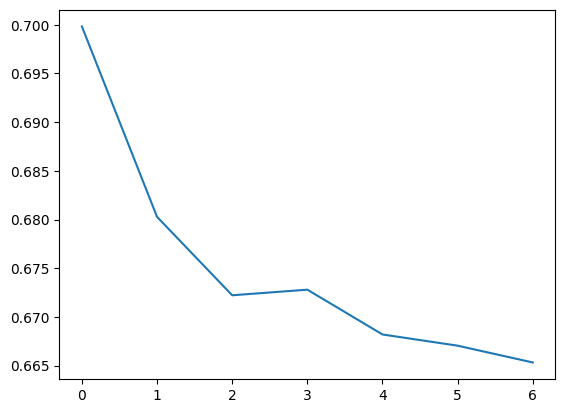

In [104]:
plt.plot(acc)

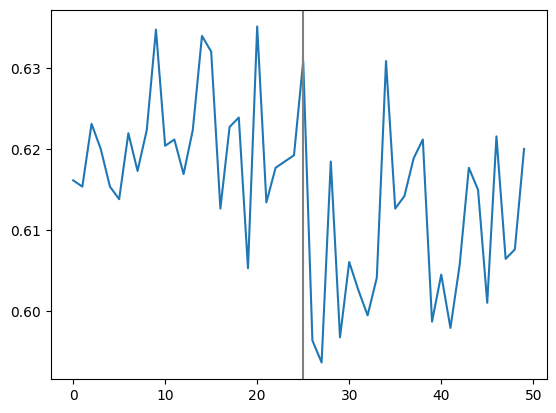

In [42]:
plt.plot(acc)
plt.axvline(t_pre/bin_width, c = 'grey')

In [43]:
len(X_train)

10313